# Housing Sale Analysis
__By: Brian Lee__

************


## Business Problem

A King County real estate agency has requested us for help in predicting housing prices. They would like to figure out which factors have the greatest effect on the price of the home. They want to cater to average home buyers. You must then translate those findings into actionable insights that the real estate agency can use to better sell the homes in the market.

## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Let's first load the housing data set into a DataFrame

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The dataset columns are defined below:

* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Data Preparation

We need to first clean up the dataset so that we can properly analyze the housing price factors.

****

Lets take a quick look at the data we are given:

In [3]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


There seems to be too many columns. Let's specify what columns we need for our analysis

Removing the following:

- date
- view
- sqft_above
- sqft_basement
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [4]:
# Dropping extraneous columns
data.drop(columns=['id','date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'], inplace=True)

We need to find missing values and replace them with appropriate values:

In [5]:
# Find missing value columns
data.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
condition          0
grade              0
yr_built           0
yr_renovated    3842
dtype: int64

In [6]:
# Analyze for replacements for 'waterfront' and 'yr_renovated'
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,17755.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,83.636778
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,399.946414
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000


We can see that waterfront and yr_renovated are missing values. We should feel comfortable with replacing the values with the median values of 0 for both seeing that both the median and 25/75 quartiles all equate to 0.

In [7]:
for col in data.columns:
    try:
        median = data[col].median()
        data[col] = data[col].fillna(value=median)
    except:
        continue
        
# Rechecking missing values and confirm none left.        
data.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

Taking a look at __'yr_renovated'__, we can see that rather than needing to see the specific year of renovation, it may be more effective to see this as a "renovated" category. 

In [8]:
# Converting yr_renovated into renovated 
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x>0 else x)

In [9]:
# Dropping original column yr_renovated
data.drop(columns=['yr_renovated'], inplace=True)

In [10]:
# Taking a look at the cleaned data
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


## Exploratory Data Analysis

Now that we have cleaned the data, let's examine the distributitions of the columns and examine the descriptive statisitics for the dataset

Lets do a basic plot to see trends to the sale price of the home to the columns

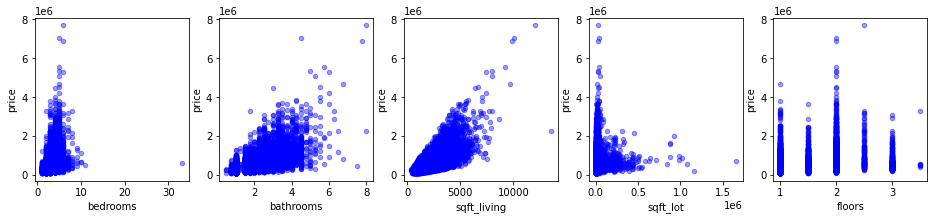

In [11]:
# Creates subplots comparing price and each column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['bedrooms','bathrooms','sqft_living','sqft_lot','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

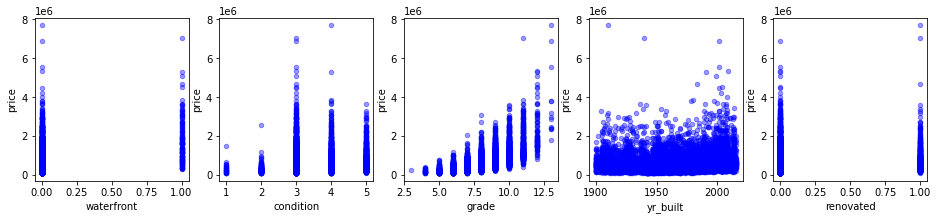

In [12]:
# Creates subplots comparing price and each column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['waterfront','condition','grade','yr_built','renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

We can see there are some columns that appear to be categorical at first glance.
- floors
- waterfront
- condition
- grade
- renovated

There may be a few outliers in the dataset as well, in particular __'bedrooms'__

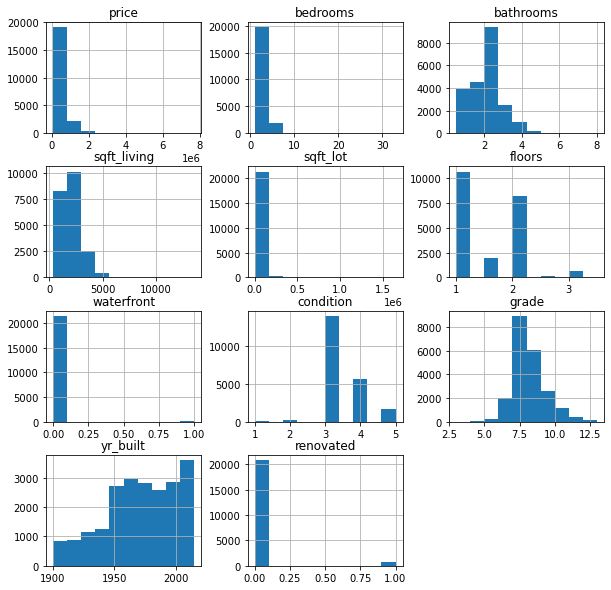

In [13]:
# Creates a histogram for each variable
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax = ax);

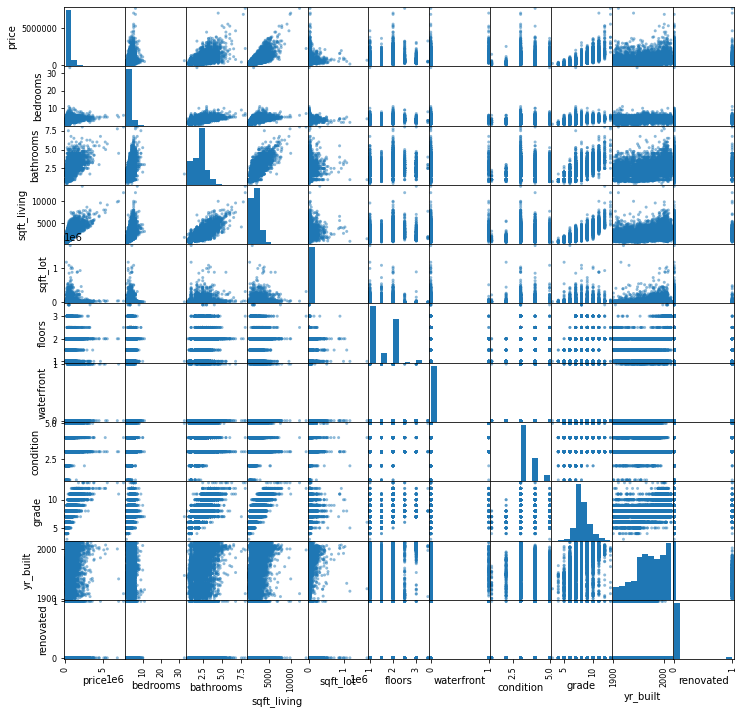

In [14]:
# Creates a scatter matrix
pd.plotting.scatter_matrix(data, figsize=[12,12]);
plt.show()

Let's check for __Linearity__

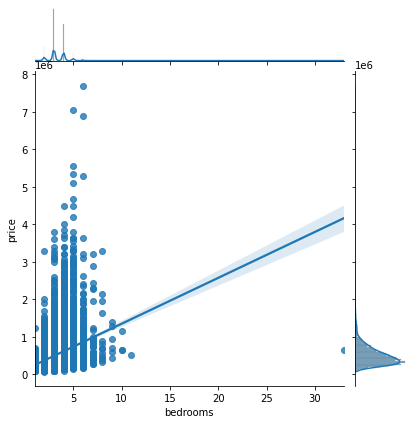

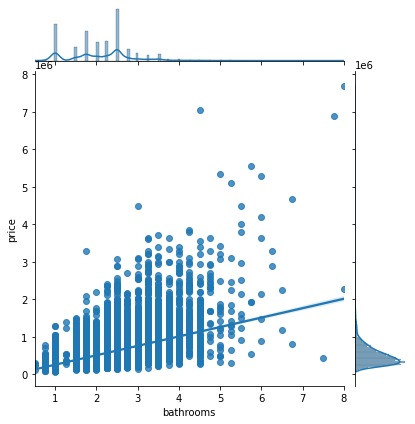

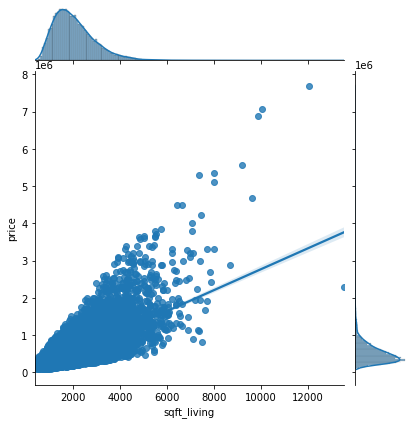

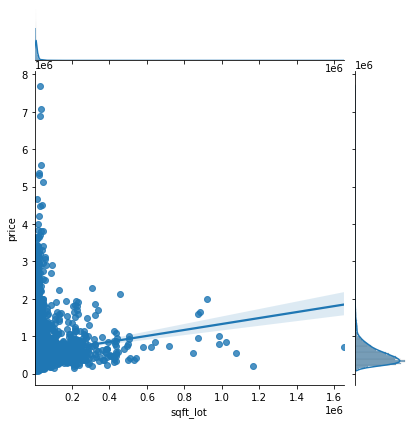

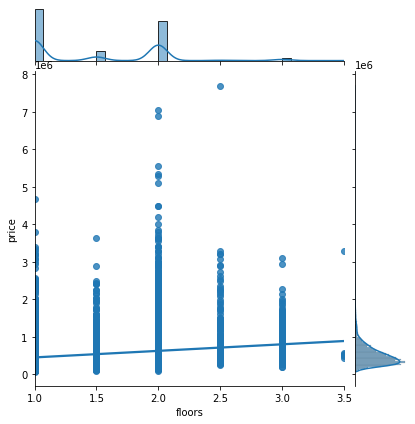

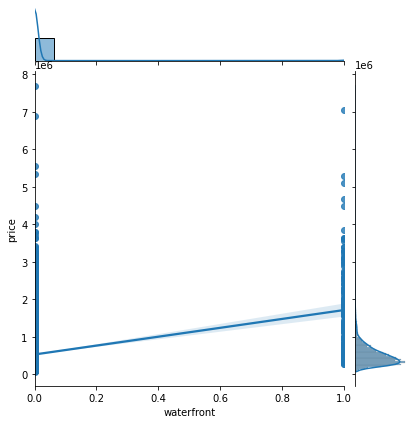

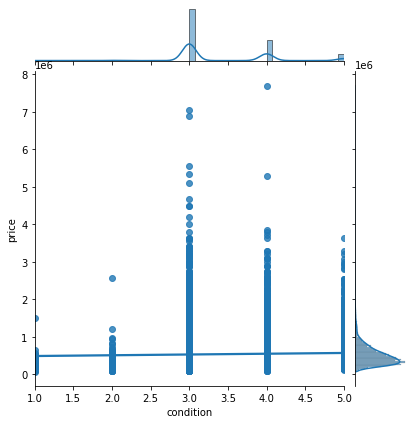

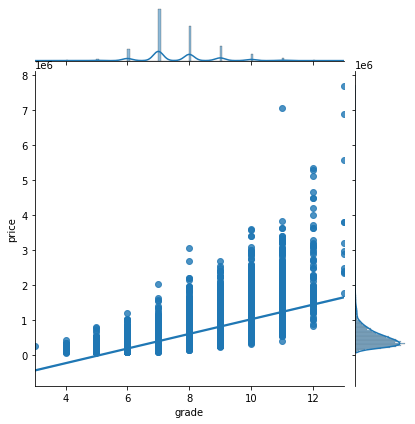

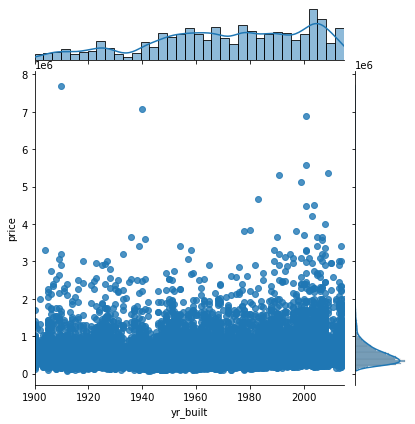

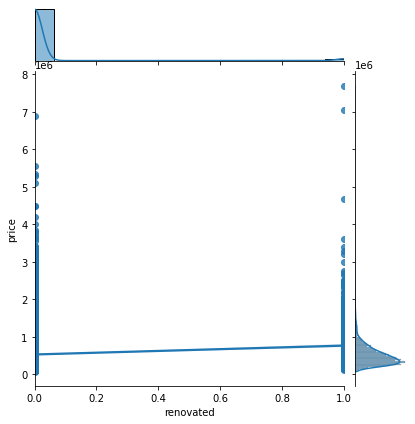

In [15]:
for col in data.columns[1:]:
    sns.jointplot(x=col, y='price', data=data, kind='reg');

* The non-categorical factors appear to be relatively linear

Let's check for __Multicollinearity__.

In [16]:
# Displays if correlation coefficient values is greater than 0.75
data.corr()
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False
grade,False,False,False,True,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False


In [17]:
# Finds which column pairs have a CC values > 0.75
df_mc = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))

df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.75) & (df_mc.cc<1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(sqft_living, bathrooms)",0.755758


The correlation table tells us that it may be better to drop __sqft_living__ as it is highly correlated with other variables.

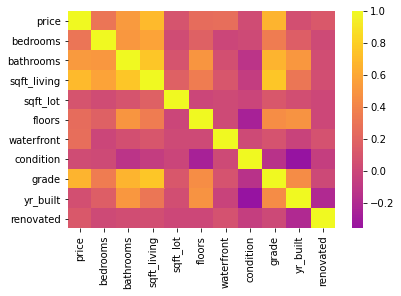

In [18]:
# Heatmap for correlation values
import seaborn as sns
sns.heatmap(data.corr(), cmap='plasma', center=0);

## Modeling

Now that we have explored the data, we can finally move on to create models to properly see the effects of each of the factors on housing sale prices. 

_Finally, you'll create a definitive model. This will include fitting an initial regression model, and then conducting statistical analyses of the results. You'll take a look at the p-values of the various features and perform some feature selection. You'll test for regression assumptions including normality, heteroscedasticity, and independence. From these tests, you'll then refine and improve the model, not just for performance, but for interpretability as well._

### Model 1: Initial Regression model

Let's model for a non-editted clean dataset

In [19]:
#Bring in a clean copy of dataset
data_1 = data.copy()
data_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


In [20]:
# Define the problem
outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
          'condition','grade','yr_built','renovated']

In [21]:
# Brief preprocessing (normalize)
data_1.columns = [col.replace(' ', '_') for col in data_1.columns]
for col in x_cols:
    data_1[col] = (data_1[col] - data_1[col].mean())/data_1[col].std()
data_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
0,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,-0.629972,-0.560787,-0.544665,-0.188883
1,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.082498,-0.629972,-0.560787,-0.680835,5.294046
2,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,-0.629972,-1.413157,-1.293596,-0.188883
3,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,2.444371,-0.560787,-0.204243,-0.188883
4,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,-0.629972,0.291583,0.544688,-0.188883


In [22]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3936.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:02:05   Log-Likelihood:            -2.9618e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21586   BIC:                         5.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1488.046    363.091      0.000    5.37e+05    5.43e+05
bedrooms    -3.926e+04   1899.954    -20.661      0.000    -4.3e+04   -3.55e+04
bathrooms    3.797e+04   2676.661     14.186      0.000    3.27e+04    4.32e+04
sqft_living  1.628e+05   3032.354     53.681      0.000    1.57e+05    1.69e+05
sqft_lot    -1.009e+04   1523.012     -6.626      0.000   -1.31e+04   -7106.699
floors       1.109e+04   1868.274      5.937      0.000    7430.270    1.48e+04
waterfront   6.161e+04   1506.519     40.893      0.000    5.87e+04    6.46e+04
condition    1.313e+04   1636.323      8.023      0.000    9920.488    1.63e+04
grade        1.525e+05   2529.246     60.278      0.000    1.47e+05    1.57e+05
yr_built     -1.11e+05   2051.663    -54.096      0.000   -1.15e+05   -1.07e+05
renovated    5148.1096   1568.491      3.282      0.001    2073.751    8222.469
==============================================================================
Omnibus:                    15847.561   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1006961.287
Skew:                           2.936   Prob(JB):                         0.00
Kurtosis:                      35.932   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Create a function for getting linear regression information from housing dataset
def linear_reg_sum(data):
    df = data.copy()
    
    y = df['price']
    X = df.drop(['price'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    
    # Training
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    
    # Significant score calculations
    print(f'R^2 Score of Train: {metrics.r2_score(y_train, y_hat_train)}')
    print(f'RMSE of Train: {np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))}')
    print(f'RMSE of Test: {np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))}')

In [24]:
linear_reg_sum(data_1)

R^2 Score of Train: 0.6462647629327138
RMSE of Train: 218410.57979528894
RMSE of Test: 219640.70438864545


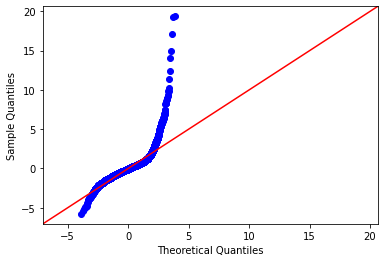

In [25]:
# Q-Q plot
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

* There were no p-values that were above 0.05
* 'bedrooms','sqft_lot', and 'yr_built' appear to be __negatively__ correlated to price
* 'bathrooms,'sqft_living','floors','waterfront','condition','grade', and 'renovated' are __positively__ correlated
* The training and test model RMSE has a difference of 1,000. Appears to be a good model
* The price residuals are quite large. There appears to be large outliers on the high end of price and a few on the lower end.

Let's check for __Homoscedasticity__:

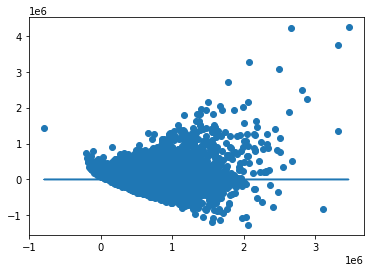

In [26]:
plt.scatter(model.predict(data_1[x_cols]), model.resid)
plt.plot(model.predict(data_1[x_cols]), [0 for i in range(len(data_1))])

Model does not look good it is spreading out. Data is scattered, possibly due to outliers, categorical values, needs to be possibly log transformed. 

### Model 2: Price Outliers

As we have observed on the previous model, let's address the price outliers we saw. This should lead to a better Q-Q plot.

In [27]:
# Make a copy of data for Model 2
data_2 = data.copy()

We need to look at the distribution of __'price'__ to see what outliers we can remove.

<AxesSubplot:xlabel='price'>

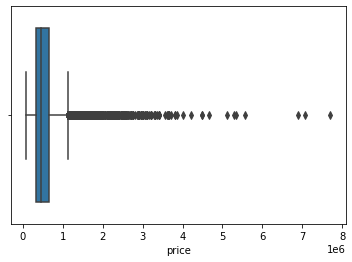

In [28]:
# Boxplot of price
sns.boxplot(x=data_2['price'])

We can see that there are clearly several high priced homes that are outliers. 

Let's use the z-score to appropriately remove the outliers

In [29]:
# Calculate z-score
z = np.abs(stats.zscore(data_2.price))
z

array([0.86671627, 0.00625157, 0.98077344, ..., 0.37618606, 0.38190525,
       0.58606486])

In [30]:
# Removing data with price z-score > 3
data_2_clean = data_2[(z<3)]

<AxesSubplot:xlabel='price'>

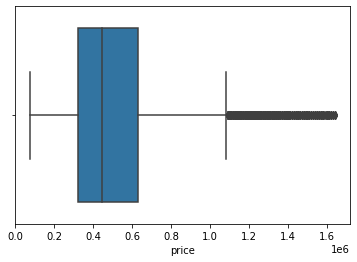

In [31]:
# Checking cleaned data
sns.boxplot(x=data_2_clean['price'])

In [32]:
# Clean copy of data 2 (no normalization)
data_2_no_norm = data_2_clean.copy()

In [33]:
# Brief preprocessing (normalize)
data_2_clean.columns = [col.replace(' ', '_') for col in data_2_clean.columns]
for col in x_cols:
    data_2_clean[col] = (data_2_clean[col] - data_2_clean[col].mean())/data_2_clean[col].std()
data_2_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
0,221900.0,-0.388103,-1.477557,-1.018820,-0.227141,-0.904441,-0.061557,-0.628831,-0.545857,-0.543841,-0.183866
1,538000.0,-0.388103,0.220763,0.642392,-0.187736,0.953270,-0.061557,-0.628831,-0.545857,-0.680428,5.438497
2,180000.0,-1.477989,-1.477557,-1.508818,-0.119471,-0.904441,-0.061557,-0.628831,-1.447647,-1.295072,-0.183866
3,604000.0,0.701784,1.239755,-0.086629,-0.243230,-0.904441,-0.061557,2.453293,-0.545857,-0.202372,-0.183866
4,510000.0,-0.388103,-0.118901,-0.421262,-0.166994,-0.904441,-0.061557,-0.628831,0.355933,0.548859,-0.183866


Let's see our new model

In [34]:
# Define the problem
X = data_2_clean.drop(['price'], axis=1)
y = data_2_clean['price']

In [35]:
# Fitting the actual model
X_int = sm.add_constant(X)
model_2 = sm.OLS(y,X_int).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     3400.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:02:06   Log-Likelihood:            -2.8410e+05
No. Observations:               21191   AIC:                         5.682e+05
Df Residuals:                   21180   BIC:                         5.683e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.07e+05   1104.544    459.022      0.000    5.05e+05    5.09e+05
bedrooms    -1.944e+04   1414.903    -13.739      0.000   -2.22e+04   -1.67e+04
bathrooms    2.673e+04   1927.026     13.872      0.000     2.3e+04    3.05e+04
sqft_living  9.199e+04   2151.404     42.758      0.000    8.78e+04    9.62e+04
sqft_lot    -2695.8273   1130.445     -2.385      0.017   -4911.586    -480.069
floors        1.84e+04   1391.265     13.226      0.000    1.57e+04    2.11e+04
waterfront   1.845e+04   1110.050     16.618      0.000    1.63e+04    2.06e+04
condition    1.307e+04   1212.529     10.781      0.000    1.07e+04    1.54e+04
grade        1.334e+05   1803.797     73.928      0.000     1.3e+05    1.37e+05
yr_built    -9.262e+04   1537.667    -60.233      0.000   -9.56e+04   -8.96e+04
renovated    3096.1535   1162.382      2.664      0.008     817.797    5374.510
==============================================================================
Omnibus:                     3269.616   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9201.933
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       5.766   Cond. No.                         4.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
linear_reg_sum(data_2_clean)

R^2 Score of Train: 0.61677598306974
RMSE of Train: 161831.05989699255
RMSE of Test: 156441.12149477913


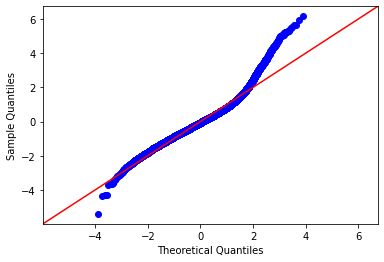

In [37]:
# Q-Q plot
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

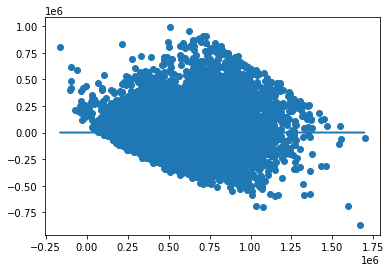

In [38]:
plt.scatter(model_2.predict(X_int), model_2.resid)
plt.plot(model_2.predict(X_int), [0 for i in range(len(X_int))])

* Q-Q plot is much more normal than before
* R-squared value has reduced due to the removal of datapoints
* RMSE difference between Train and Test are still fine (5k difference)
* Homoscedasticity has improved. There is still a trend, but may be improved on with additional changes

### Model 3: Categorical Variables

Let's appropriately analyse the factors again with a few appropriately identified as categoricals.

In [39]:
# Iterating on Model 1 data
data_3 = data_2_no_norm.copy()

In [40]:
# List out the continuous and categorical variables
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
categoricals = ['floors', 'waterfront', 'condition', 'grade','renovated']

In [41]:
# Change to str for dummies
data_3['floors'] = data_3['floors'].apply(str)
data_3['waterfront'] = data_3['waterfront'].apply(lambda x: 'yes' if x>0 else 'no')
data_3['condition'] = data_3['condition'].apply(str)
data_3['grade'] = data_3['grade'].apply(str)
data_3['renovated'] = data_3['renovated'].apply(lambda x: 'yes' if x>0 else 'no')

In [42]:
# Create Dummies for categorical variables
data_ohe = pd.get_dummies(data_3[categoricals], prefix=categoricals, drop_first=True)
data_ohe.columns

Index(['floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_yes', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_11', 'grade_12', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'renovated_yes'],
      dtype='object')

In [43]:
# normalize the continuous data
data_cont = data_3[continuous]

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_norm = data_cont.apply(normalize)

In [44]:
# Combine data for new dataset for Model 2
data_3_pc = pd.concat([data_norm, data_ohe], axis=1)
data_3_pc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,floors_1.5,floors_2.0,floors_2.5,floors_3.0,...,grade_11,grade_12,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_yes
0,-1.098851,-0.388103,-1.477557,-1.018820,-0.227141,-0.543841,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.119438,-0.388103,0.220763,0.642392,-0.187736,-0.680428,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-1.260339,-1.477989,-1.477557,-1.508818,-0.119471,-1.295072,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.373811,0.701784,1.239755,-0.086629,-0.243230,-0.202372,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.011523,-0.388103,-0.118901,-0.421262,-0.166994,0.548859,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
X = data_3_pc.drop('price', axis=1)
y = data_3_pc['price']

In [46]:
X_int = sm.add_constant(X)
model_3 = sm.OLS(y,X_int).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1403.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:02:07   Log-Likelihood:                -19714.
No. Observations:               21191   AIC:                         3.948e+04
Df Residuals:                   21165   BIC:                         3.969e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0619      0.117      9.046      0.000       0.832       1.292
bedrooms          -0.0601      0.006    -10.907      0.000      -0.071      -0.049
bathrooms          0.1142      0.007     15.327      0.000       0.100       0.129
sqft_living        0.3401      0.009     39.864      0.000       0.323       0.357
sqft_lot          -0.0132      0.004     -3.042      0.002      -0.022      -0.005
yr_built          -0.3434      0.007    -52.681      0.000      -0.356      -0.331
floors_1.5         0.0498      0.016      3.054      0.002       0.018       0.082
floors_2.0         0.0480      0.012      3.977      0.000       0.024       0.072
floors_2.5         0.2437      0.054      4.546      0.000       0.139       0.349
floors_3.0         0.4606      0.028     16.313      0.000       0.405       0.516
floors_3.5         0.4144      0.251      1.650      0.099      -0.078       0.906
waterfront_yes     1.1402      0.069     16.488      0.000       1.005       1.276
condition_2       -0.0843      0.124     -0.681      0.496      -0.327       0.158
condition_3        0.0780      0.115      0.678      0.498      -0.148       0.304
condition_4        0.1281      0.115      1.113      0.266      -0.097       0.354
condition_5        0.2695      0.116      2.328      0.020       0.043       0.496
grade_11           0.4815      0.042     11.501      0.000       0.399       0.564
grade_12           1.1011      0.111      9.934      0.000       0.884       1.318
grade_3           -2.2059      0.615     -3.588      0.000      -3.411      -1.001
grade_4           -2.0649      0.122    -16.900      0.000      -2.304      -1.825
grade_5           -2.0950      0.049    -42.620      0.000      -2.191      -1.999
grade_6           -1.8891      0.031    -61.281      0.000      -1.950      -1.829
grade_7           -1.5159      0.026    -59.286      0.000      -1.566      -1.466
grade_8           -1.0884      0.024    -46.283      0.000      -1.135      -1.042
grade_9           -0.4837      0.023    -20.586      0.000      -0.530      -0.438
renovated_yes      0.0869      0.025      3.462      0.001       0.038       0.136
==============================================================================
Omnibus:                     3197.698   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9274.025
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.812   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
linear_reg_sum(data_3_pc)

R^2 Score of Train: 0.6253793942236275
RMSE of Train: 0.6166762713232646
RMSE of Test: 0.6014094935086501


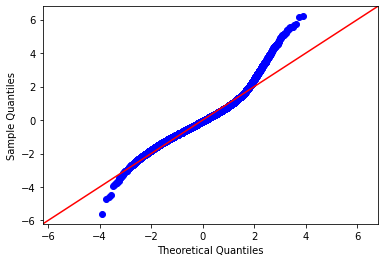

In [48]:
# Q-Q plot
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

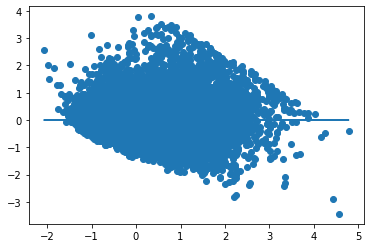

In [49]:
plt.scatter(model_3.predict(X_int), model_3.resid)
plt.plot(model_3.predict(X_int), [0 for i in range(len(data_3_pc))])

* Q-Q plot is similar to Model 2
* R-squared value has increased from Model 2
* RMSE difference between Train and Test are still fine
* Homoscedasticity has slightly improved. There is still a trend, but may be improved on with additional changes

### Model 4: Log Transform

Let's log transform the model data to transform the skewed data to normal

In [50]:
# Iterating on Model 1 data
data_4 = data_2_no_norm.copy()

In [51]:
# List out the continuous and categorical variables
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
categoricals = ['floors', 'waterfront', 'condition', 'grade','renovated']

In [52]:
# Change to str for dummies
data_4['floors'] = data_4['floors'].apply(str)
data_4['waterfront'] = data_4['waterfront'].apply(lambda x: 'yes' if x>0 else 'no')
data_4['condition'] = data_4['condition'].apply(str)
data_4['grade'] = data_4['grade'].apply(str)
data_4['renovated'] = data_4['renovated'].apply(lambda x: 'yes' if x>0 else 'no')

In [53]:
# Create Dummies for categorical variables
data_ohe = pd.get_dummies(data_4[categoricals], prefix=categoricals, drop_first=True)
data_ohe.columns

Index(['floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_yes', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_11', 'grade_12', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'renovated_yes'],
      dtype='object')

In [54]:
# Log transform and normalize
data_cont = data_4[continuous]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

In [55]:
# Combine data for new dataset for Model 3
data_4_pc = pd.concat([data_log_norm, data_ohe], axis=1)
data_4_pc.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,yr_built_log,floors_1.5,floors_2.0,floors_2.5,floors_3.0,...,grade_11,grade_12,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_yes
0,-1.463747,-0.263828,-1.725013,-1.124885,-0.375587,-0.536613,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.365886,-0.263828,0.372979,0.772925,-0.099188,-0.673950,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-1.896080,-1.700993,-1.725013,-2.165666,0.260100,-1.295470,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.604944,0.755857,1.117254,0.112289,-0.511667,-0.194497,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.255468,-0.263828,0.068258,-0.263548,0.022726,0.552070,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
X = data_4_pc.drop('price_log', axis=1)
y = data_4_pc['price_log']

In [57]:
display(X.head())
display(y.head())

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,yr_built_log,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,...,grade_11,grade_12,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_yes
0,-0.263828,-1.725013,-1.124885,-0.375587,-0.536613,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.263828,0.372979,0.772925,-0.099188,-0.673950,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-1.700993,-1.725013,-2.165666,0.260100,-1.295470,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.755857,1.117254,0.112289,-0.511667,-0.194497,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.263828,0.068258,-0.263548,0.022726,0.552070,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


0   -1.463747
1    0.365886
2   -1.896080
3    0.604944
4    0.255468
Name: price_log, dtype: float64

In [58]:
X_int = sm.add_constant(X)
model_4 = sm.OLS(y,X_int).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1280.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:02:08   Log-Likelihood:                -20310.
No. Observations:               21191   AIC:                         4.067e+04
Df Residuals:                   21165   BIC:                         4.088e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7789      0.121      6.453      0.000       0.542       1.015
bedrooms_log       -0.0889      0.006    -14.977      0.000      -0.101      -0.077
bathrooms_log       0.0924      0.008     11.750      0.000       0.077       0.108
sqft_living_log     0.3955      0.009     42.447      0.000       0.377       0.414
sqft_lot_log       -0.0728      0.005    -13.931      0.000      -0.083      -0.063
yr_built_log       -0.3462      0.007    -51.145      0.000      -0.360      -0.333
floors_1.5          0.0571      0.017      3.387      0.001       0.024       0.090
floors_2.0          0.0449      0.013      3.514      0.000       0.020       0.070
floors_2.5          0.1174      0.055      2.121      0.034       0.009       0.226
floors_3.0          0.3893      0.031     12.735      0.000       0.329       0.449
floors_3.5          0.4204      0.258      1.627      0.104      -0.086       0.927
waterfront_yes      0.8908      0.071     12.498      0.000       0.751       1.031
condition_2        -0.0496      0.127     -0.389      0.697      -0.299       0.200
condition_3         0.2595      0.118      2.192      0.028       0.027       0.492
condition_4         0.2983      0.118      2.519      0.012       0.066       0.530
condition_5         0.4206      0.119      3.532      0.000       0.187       0.654
grade_11            0.3050      0.043      7.144      0.000       0.221       0.389
grade_12            0.5673      0.114      4.996      0.000       0.345       0.790
grade_3            -1.7915      0.633     -2.831      0.005      -3.032      -0.551
grade_4            -2.2013      0.126    -17.413      0.000      -2.449      -1.954
grade_5            -2.2102      0.051    -43.478      0.000      -2.310      -2.111
grade_6            -1.8675      0.031    -59.702      0.000      -1.929      -1.806
grade_7            -1.3915      0.025    -55.398      0.000      -1.441      -1.342
grade_8            -0.9111      0.023    -39.196      0.000      -0.957      -0.866
grade_9            -0.3646      0.024    -15.268      0.000      -0.411      -0.318
renovated_yes       0.0137      0.026      0.530      0.596      -0.037       0.064
==============================================================================
Omnibus:                       93.917   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.397
Skew:                          -0.112   Prob(JB):                     4.77e-24
Kurtosis:                       3.267   Cond. No.                         243.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Create a function for getting linear regression information from housing dataset for log
def linear_reg_sum_log(data):
    df = data.copy()
    
    y = df['price_log']
    X = df.drop(['price_log'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    
    # Training
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    
    # Significant score calculations
    print(f'R^2 Score of Train: {metrics.r2_score(y_train, y_hat_train)}')
    print(f'RMSE of Train: {np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))}')
    print(f'RMSE of Test: {np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))}')

In [60]:
linear_reg_sum_log(data_4_pc)

R^2 Score of Train: 0.6023678834040344
RMSE of Train: 0.6325323400670484
RMSE of Test: 0.6251384954320163


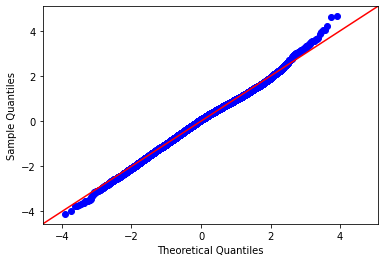

In [61]:
# Q-Q plot
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

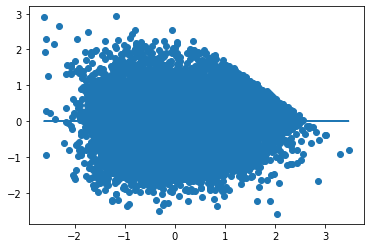

In [62]:
plt.scatter(model_4.predict(X_int), model_4.resid)
plt.plot(model_4.predict(X_int), [0 for i in range(len(data_4_pc))])

* R-squared value went down from Model 3, but not by a large amount. __60% of the variation in price can be explained by the factors in the model__
* Q-Q plot appears to be linear. It is very close to 0 residuals. __Best Q-Q plot thus far!__
* Homoscedasticity has improved from Model 3. __Best Homoscedasticity thus far!__
* Largest factors for better home prices are __whether the home is along a waterfront__ and having a good __grade__ and __condition__ of the home.

__Model 4__ with the previous iterations is the best model to observe the effects of the variables on Housing sale prices.

In [63]:
# Let's get the coefficients
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [64]:
linreg.coef_

array([-0.08887593,  0.09242832,  0.39547839, -0.0728257 , -0.3462355 ,
        0.05710396,  0.04492364,  0.11741703,  0.38928367,  0.42043744,
        0.89081643, -0.04957772,  0.25946036,  0.29825495,  0.42064787,
        0.30495806,  0.56732451, -1.79150016, -2.2013249 , -2.21024722,
       -1.86750937, -1.39154091, -0.91114017, -0.36455841,  0.01368457])

In [65]:
coeff_df = pd.DataFrame(linreg.coef_, X.columns, columns = ['coefficient'])

In [66]:
coeff_df.value_counts()

coefficient
 0.890816      1
 0.013685      1
-2.201325      1
-1.867509      1
-1.791500      1
-1.391541      1
-0.911140      1
-0.364558      1
-0.346235      1
-0.088876      1
-0.072826      1
-0.049578      1
 0.044924      1
 0.567325      1
 0.057104      1
 0.092428      1
 0.117417      1
 0.259460      1
 0.298255      1
 0.304958      1
 0.389284      1
 0.395478      1
 0.420437      1
 0.420648      1
-2.210247      1
dtype: int64

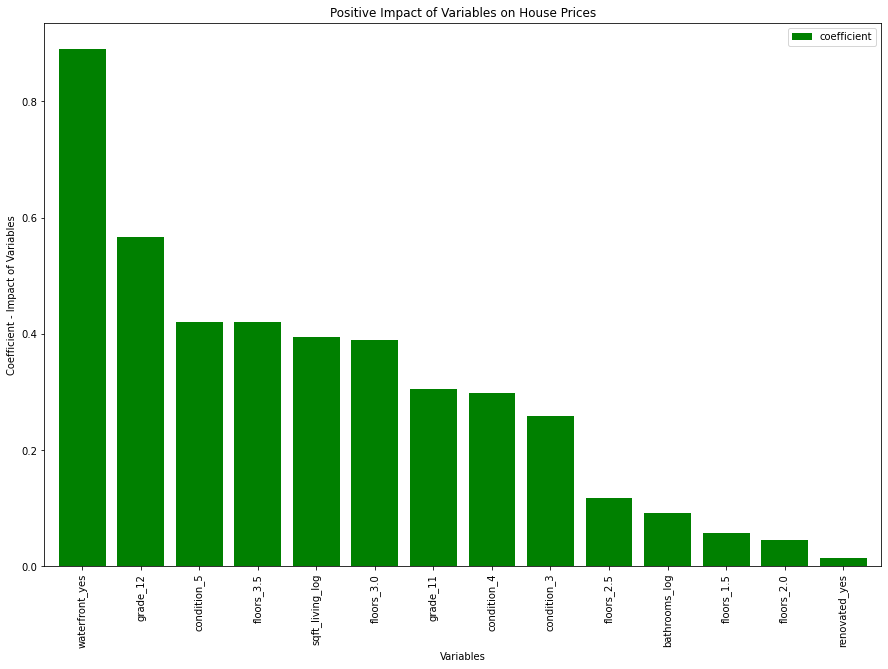

In [67]:
# Create a barplot of positive impacting factors
ax = coeff_df[coeff_df['coefficient'] > 0].sort_values(by=['coefficient'], ascending=False).plot(kind='bar', width=0.8, color = 'green', figsize=(15,10))
ax.set_title("Positive Impact of Variables on House Prices")
ax.set_xlabel("Variables")
ax.set_ylabel("Coefficient - Impact of Variables");

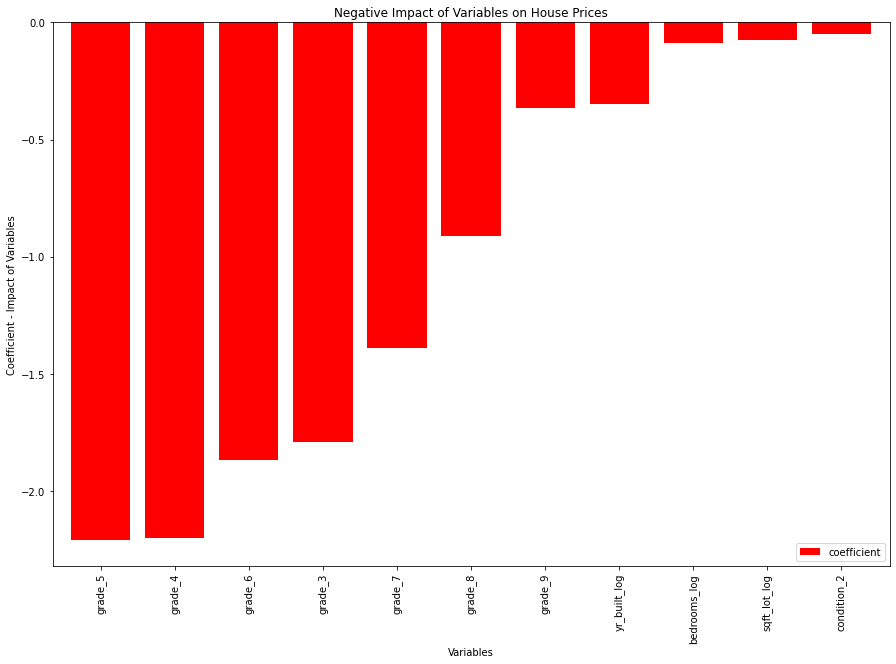

In [68]:
# Create a barplot of positive impacting factors
ax = coeff_df[coeff_df['coefficient'] < 0].sort_values(by=['coefficient']).plot(kind='bar', width=0.8, color='red', figsize=(15,10))
ax.set_title("Negative Impact of Variables on House Prices")
ax.set_xlabel("Variables")
ax.set_ylabel("Coefficient - Impact of Variables");
ax.legend(loc='lower right')

## Conclusions

The analysis of the housing sale price datasets resulted in the following conclusions:

* Having a __Waterfront__ has the largest impact on house sale prices. It may be good to increase prices on these homes as customers are more willing to pay the premium.

* A great __Condition__ and __Grade__ of a home are the second most important to a higher price payed for the home. Thus, __Renovations__ increases the prices if it provides an improvement to the overall condition and grade. Random renovations may not have a great impact on the price of a home.

* Having a larger living space as seen with increase __Sq.ft.of Living Space__ and more __Floors__ can increase the price of the home. It makes sense as people will pay for more space.

## Next Steps

Further analyses of the housing price dataset could yield additional insights to other recommendations:
* __Finding the best locations in King County that yield higher house sale prices__
* __Creating an estimation tool for a home based on inputting the correlated factors__
* __Analyzing factors further to estimate homes for a lower budget customer__